In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [2]:
flatdata = pd.read_csv ('datasets/Price.csv')
X = flatdata.iloc [:,0].values
y = flatdata.iloc [:,1].values
X=X.reshape(-1, 1)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = .20)

In [4]:
# Fitting DecisionTree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(max_depth=3)
dt_reg.fit(X_train, y_train)
y_1 = dt_reg.predict(X_test)

In [5]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_2 = lin_reg.predict(X_test)

In [6]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
#print(X_train)
#print(X_poly)
poly_reg.fit(X_poly, y_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)
y_3 = lin_reg_2.predict(poly_reg.fit_transform(X_test))
poly_reg.get_params(deep=False)

{'degree': 2, 'include_bias': True, 'interaction_only': False}

### Polynomial Regression
* Special case of linear regression
* Generate a new feature matrix consisting of all polynomial combinations  
* if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2]

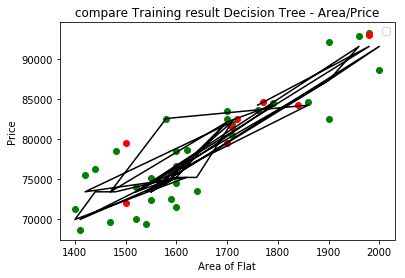

In [25]:
# Visualising the DecisionTree Regression results
plt.scatter(X_train, y_train, color = 'green')
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, dt_reg.predict(X_train), color="black")
plt.xlabel("Area of Flat")
plt.ylabel("Price")
plt.title("compare Training result Decision Tree - Area/Price")
plt.legend()
plt.show()

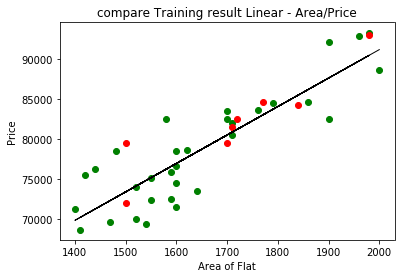

In [8]:
# Visualising the Linear Regression results
plt.scatter(X_train, y_train, color = 'green')
plt.scatter(X_test, y_test, color = 'red')
plt.plot (X, lin_reg.predict(X), color = 'black',linewidth=1)
plt.title ('compare Training result Linear - Area/Price')
plt.xlabel('Area of Flat')
plt.ylabel('Price')
plt.show()

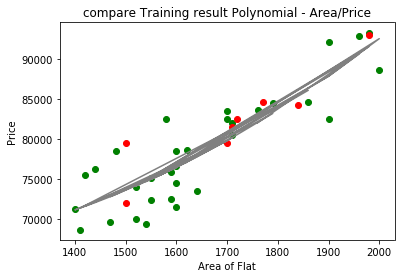

In [15]:
# Visualising the Polynomial Regression results
plt.scatter(X_train, y_train, color = 'green')
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, lin_reg_2.predict(poly_reg.fit_transform(X_train)), color = 'grey')
#plt.plot(X_train,y_train,'.', np.sort(X_train),np.polyval(best_coef,np.sort(X_train)),'-r')
plt.title ('compare Training result Polynomial - Area/Price')
plt.xlabel('Area of Flat')
plt.ylabel('Price')
plt.show()

In [10]:
from sklearn import metrics

In [11]:
# RMSE DecisionTree Regression
np.sqrt(metrics.mean_squared_error(y_1, y_test))

2494.869264431491

In [12]:
# RMSE Linear Regression
np.sqrt(metrics.mean_squared_error(y_2, y_test))

2593.18663220409

In [13]:
# RMSE Polynomial Regression
np.sqrt(metrics.mean_squared_error(y_3, y_test))

2556.0751264015685